In [7]:
# required packages to fetch and process data with pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [8]:
# load medals data using pandas
medals_data = pd.read_csv("medals.csv")

# Exploratory Data Analysis

In [9]:
medals_data.head()

,Games,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
0,Athens (1896),1896,Aquatics,Swimming,alfred hajos,HUN,Men,100m freestyle men,Gold,1,0,0
1,Athens (1896),1896,Aquatics,Swimming,Otto Herschmann,AUT,Men,100m freestyle men,Silver,0,1,0
2,Athens (1896),1896,Aquatics,Swimming,dimitrios drivas,GRE,Men,100m freestyle for sailors men,Bronze,0,0,1
3,Athens (1896),1896,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100m freestyle for sailors men,Gold,1,0,0
4,Athens (1896),1896,Aquatics,Swimming,spiridon chasapis,GRE,Men,100m freestyle for sailors men,Silver,0,1,0


### General Assumptions

**Games**:     This variable describles olympic game with year <br>
**Year**:      This variable is Year of game <br>
**Sport**:     Sport of the game <br>
**Discipline**:category of sport <br>
**Athlete**:   Athlete who participated in particular sport of category in particular year <br>
**Team**:      Team code of Athlete <br>
**Gender**:    gender of Athlete <br>
**Event**:     Event name in which Athlete won the medal <br>
**Medal**:     Type of medal Athlete won <br>
**Gold**:      Flag number <br>
**Silver**:    Flag number <br>
**Bronze**:    Flag number <br>



In [10]:
# basic exploration
medals_data.describe(include='all')
# looks like max value of gold flag is 10. let's check in boxplot

,Games,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
count,33261,33261.000000,33261,33261,33261,33261,33261,33261,33261,33261.00000,33261.000000,33261.000000
unique,28,NaN,42,56,24303,150,3,879,3,NaN,NaN,NaN
top,Rio (2016),NaN,Aquatics,Athletics,Michael Phelps,USA,Men,football men,Gold,NaN,NaN,NaN
freq,2082,NaN,4508,3867,28,4869,22726,1233,11180,NaN,NaN,NaN
mean,NaN,1973.340188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.33640,0.330327,0.333544
std,NaN,33.940163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.47534,0.470338,0.471486
min,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,0.000000
25%,NaN,1952.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,0.000000
50%,NaN,1984.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,0.000000
75%,NaN,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.000000,1.000000


#### Outlier Detection

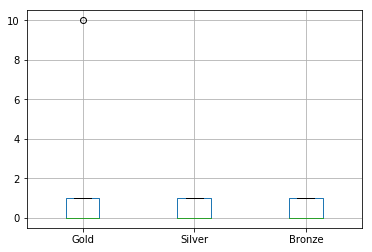

In [11]:
medals_data.boxplot(column=['Gold','Silver','Bronze'])
# oops, it's an outlier in Gold variable flag. 


In [12]:
# looks like there is data error for GOLD which is 10. 
#Assuming Gold, Silver, Bronze columns are flag values with 1.  
#replacing this 10 value with 1
medals_data['Gold'] = np.where(medals_data['Gold'] > 1, 1, medals_data['Gold'])

In [13]:
medals_data.isna().sum()

Games         0
Year          0
Sport         0
Discipline    0
Athlete       0
Team          0
Gender        0
Event         0
Medal         0
Gold          0
Silver        0
Bronze        0
dtype: int64

In [892]:
medals_data.columns

Index(['Games', 'Year', 'Sport', 'Discipline', 'Athlete', 'Team', 'Gender',
       'Event', 'Medal', 'Gold', 'Silver', 'Bronze'],
      dtype='object')

In [893]:
# cleaning string names
medals_data['Athlete'] = medals_data['Athlete'].map(lambda x: re.sub('[^A-Za-z ]+', '', x))
# converting some columns string into lower case as it may effect in count and sum aggregations
medals_data['Sport'] = medals_data['Sport'].map(lambda x: x.lower())
medals_data['Athlete'] = medals_data['Athlete'].map(lambda x: x.lower())
medals_data['Event'] = medals_data['Event'].map(lambda x: x.lower())

In [894]:
result_df = medals_data.drop_duplicates()

In [895]:
df= result_df.copy()

## Unique columns are created based on following assumptions

### To make Athlete unique as same Athlete name can be in another team with same gender.
### To make event unique as same event name can be in different year game.

In [896]:
# creating some unique combination columns useful for analysis
df['athlete_unique_col']= df['Team']+'_'+df['Athlete']+'_'+df['Gender']
df['event_unique_col']= df['Games']+'_'+df['Sport']+'_'+df['Discipline']+'_'+df['Event']

# Q1. Five athletes who won the most gold medals in Athletics 

### Solution Using Pandas

In [897]:
top5_athlets = df[df['Sport']=='athletics'].groupby(['athlete_unique_col','Athlete'])['Gold'].sum().reset_index().sort_values('Gold',ascending=False).head()

In [898]:
list(top5_athlets.loc[:,'Athlete'])

['carl lewis', 'paavo nurmi', 'ray ewry', 'usain bolt', 'ville ritola']

# Q2. Five athletes who won gold medals in the largest number of different athletic events

### Solution with Pandas

### Following steps are considered for solution

Step 1 : considering athlete unique value and aggregating number of medals in different events <br>
Step 2 : excluded all rows where Gold variable is 0. i.e, where athelete did not achieve gold medal <br>
Step 3: creating a flag variable says where athletes achieved atleast 1 gold medal in different events. <br>
Step 4 : Now, we have dataset where athletes won gold medal in different events <br>
Step 5 : aggregating on flag variable based on unique field and sorting in descending order gives top results

In [899]:
# grouping athelts to different events and counting number of gold medals by each athlete
events_data = df.groupby(["athlete_unique_col","Event","Athlete"])['Gold'].sum().reset_index()

In [900]:
# excluding unwanted rows where there are no gold medals by athlet
events_data = events_data[events_data['Gold']>0]
events_data['gold_flag']=1

In [901]:
top5_athlete_in_events = events_data.groupby(['athlete_unique_col','Athlete'])['gold_flag'].sum().reset_index().sort_values('gold_flag',ascending=False).head()

In [902]:
top5_athlete_in_events

,athlete_unique_col,Athlete,gold_flag
8264,USA_michael phelps_Men,michael phelps,8
8185,USA_mark spitz_Men,mark spitz,7
1686,EUN_vitaly scherbo_Men,vitaly scherbo,6
6457,URS_boris shakhlin_Men,boris shakhlin,6
446,BEL_hubert van innis_Men,hubert van innis,6


In [903]:
list(top5_athlete_in_events.loc[:,'Athlete'])

['michael phelps',
 'mark spitz',
 'vitaly scherbo',
 'boris shakhlin',
 'hubert van innis']

# Q3. Top Five of different athletic events after removing guilty athlets

## In above question results, Third position based on number gold medals shared by 5 Athletes. Assuming "vitaly scherbo" as third Athlete as per index results.

### Following steps are considered for solution

Step 1 : As per above results, "michael phelps" and "vitaly scherbo" found guilty as per their result values. <br>
Step 2 : considering all events where these 2 athelets are participated <br>
Step 3 : making their gold flag values to null and upgrading medals in these events <br>
Step 4 : considering athlete unique value and aggregating number of medals in different events <br>
Step 2 : excluded all rows where Gold variable is 0. i.e, where athelete did not achieve gold medal <br>
Step 3 : creating a flag variable says where athletes achieved atleast 1 gold medal in different events. <br>
Step 4 : Now, we have dataset where athletes won gold medal in different events <br>
Step 5 : aggregating on flag variable based on unique field and sorting in descending order gives top results <br>


In [904]:
# getting guilty results set where these 2 athelets presented in all events
guilty_found_results=df[(df.athlete_unique_col=='USA_michael phelps_Men') |(df.athlete_unique_col=='EUN_vitaly scherbo_Men')].groupby(['event_unique_col','athlete_unique_col']).sum().reset_index()

# giving a flag value which helps in excluding these values
guilty_found_results['disq']= 1

In [905]:
# creating a new revised dataset which will exclude above results in following lines
revised_results = pd.merge(df,guilty_found_results.loc[:,['event_unique_col','disq']],how='left',on=['event_unique_col'])

In [906]:
# whereever there is null value after merge, which means we do not need to consider 
# those events for medals redistribution
revised_results= revised_results.fillna(0)

In [907]:
# This will make all gold medal values 0 where first and third athlete present( flag value indicates their events)
revised_results['Gold']= np.where((revised_results['disq']==1)&(revised_results['Gold']==1),0,revised_results['Gold'])
# after removing gold medals from these 2, upgrading silver medal athletes to gold medal
revised_results['Gold']= np.where((revised_results['Silver']==1) & (revised_results['disq']==1),1,revised_results['Gold'])
# whereever these is a bronze medal in these events, they are upgraded to silver
revised_results['Silver']= np.where((revised_results['Bronze']==1) & (revised_results['disq']==1),1,revised_results['Silver'])
# whereever these is a bronze medal in these events, they are upgraded to silver and making them 0
revised_results['Bronze']= np.where((revised_results['Bronze']==1) & (revised_results['disq']==1),0,revised_results['Silver'])

### Applying same logic on revised dataset

In [908]:
# applying same logic applied for question 2 above
revised_events_data = revised_results.groupby(["athlete_unique_col","Event","Athlete"])['Gold'].sum().reset_index()

In [909]:
# excluding unwanted rows where there are no gold medals by athlet
revised_events_data = revised_events_data[revised_events_data['Gold']>0]

In [910]:
# flag value
revised_events_data['gold_flag']=1
top5_in_revised_data = revised_events_data.groupby(['athlete_unique_col','Athlete'])['gold_flag'].sum().reset_index().sort_values('gold_flag',ascending=False).head()

In [911]:
list(top5_in_revised_data.loc[:,'Athlete'])

['mark spitz',
 'boris shakhlin',
 'kristin otto',
 'hubert van innis',
 'paavo nurmi']